<div align="center"><h1>
FYS-STK4155 - Exercises Week 36
</div>
<hr style="border:2px solid gray"> </hr>
<div align="center"><h3>
Håvard Skåli
</div>

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

## Exercise 1:

### a)

If we define the cost function as
$$
C_\textrm{Ridge}(\boldsymbol{\beta}) = \frac{1}{n}\left\{\left(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\right)^\textrm{T}\left(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\right)+ \lambda\boldsymbol{\beta}^\textrm{T}\boldsymbol{\beta}\right\} 
$$
we can use the standard approach to find the expression for the optimal Ridge parameters. We know that the partial derivative of the ordinary least squares cost function (which is the first term above) with respect to $\boldsymbol{\beta}$ is
$$
\frac{\partial C_\textrm{OLS}(\boldsymbol{\beta})}{\partial\boldsymbol{\beta}}
= -\frac{2}{n}\mathbf{X}^\textrm{T}\left(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\right),
$$
while it is easy to see that
$$
\frac{\partial\left(n^{-1}\lambda\boldsymbol{\beta}^\textrm{T}\boldsymbol{\beta}\right)}{\partial\boldsymbol{\beta}}
= \frac{1}{n}\lambda\frac{\partial\boldsymbol{\beta}^2}{\partial\boldsymbol{\beta}} = \frac{2}{n}\lambda\boldsymbol{\beta},
$$
hence the partial derivative of the Ridge cost function:
$$
\frac{\partial C_\textrm{Ridge}(\boldsymbol{\beta})}{\partial\boldsymbol{\beta}}
= -\frac{2}{n}\mathbf{X}^\textrm{T}\left(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\right) + \frac{2}{n}\lambda\boldsymbol{\beta}.
$$
We then wish to have
$$
\mathbf{X}^\textrm{T}\left(\mathbf{y}-\mathbf{X}\boldsymbol{\beta}\right) - \lambda\boldsymbol{\beta} = 0 \hspace{10pt}\Rightarrow\hspace{10pt}
\mathbf{X}^\textrm{T}\mathbf{y} = \mathbf{X}^\textrm{T}\mathbf{X}\boldsymbol{\beta} + \lambda\mathbf{I}\boldsymbol{\beta},
$$
where I have used that $\mathbf{I}\boldsymbol{\beta}=\boldsymbol{\beta}$. If the matrix $\mathbf{X}^\textrm{T}\mathbf{X} + \lambda\mathbf{I}$ is invertible we thus have
$$
\boldsymbol{\beta}_\textrm{Ridge} = \left(\mathbf{X}^\textrm{T}\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^\textrm{T}\mathbf{y},
$$
just like we wanted to show.

### b)

For the ordinary least squares solutions we have
$$
\begin{aligned}
\mathbf{\tilde{y}}_\textrm{OLS} &= \mathbf{X}\boldsymbol{\beta}_\textrm{OLS} = \mathbf{X}\left(\mathbf{X}^\textrm{T}\mathbf{X} \right)^{-1}\mathbf{X}^\textrm{T}\mathbf{y}
= \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T}\left(\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\underbrace{\mathbf{U}^\textrm{T} \mathbf{U}}_{\mathbf{I}_{n\times n}}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T}\right)^{-1}\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y} \\
&= \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T}\left(\boldsymbol{\Sigma}^\textrm{T}\boldsymbol{\Sigma}\underbrace{\mathbf{V}\mathbf{V}^\textrm{T}}_{\mathbf{I}_{p\times p}}\right)^{-1}\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y}
= \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T}\boldsymbol{\tilde{\Sigma}}^{-2}_{p\times p}\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y}
= \mathbf{U}\boldsymbol{\Sigma}\boldsymbol{\tilde{\Sigma}}^{-2}_{p\times p}\underbrace{\mathbf{V}\mathbf{V}^\textrm{T}}_{\mathbf{I}_{p\times p}}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y}
\\
&= \mathbf{U}\underbrace{\boldsymbol{\Sigma}\boldsymbol{\tilde{\Sigma}}^{-2}_{p\times p}\boldsymbol{\Sigma}^\textrm{T}}_{\mathbf{I}_{n\times n}}\mathbf{U}^\textrm{T}\mathbf{y}
= \mathbf{U}\mathbf{U}^\textrm{T}\mathbf{y} = \sum_{j=0}^{p-1}\mathbf{u}_j\mathbf{u}_j^\textrm{T}\mathbf{y},
\end{aligned}
$$
where I have used the orthogonality of $\mathbf{U}$ and $\mathbf{V}$, and defined $\boldsymbol{\tilde{\Sigma}}_{p\times p}$ as the square matrix with the squares of the singular values $\sigma_j$ on its diagonal. Moreover, for Ridge regression we have
$$
\begin{aligned}
\mathbf{\tilde{y}}_\textrm{Ridge} 
&= \mathbf{X}\boldsymbol{\beta}_\textrm{Ridge} 
= \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T}\left(\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T} + \lambda\mathbf{I}_{p\times p}\right)^{-1}\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y} \\
&= \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T}\left(\boldsymbol{\tilde{\Sigma}}^{2}_{p\times p} + \lambda\mathbf{I}_{p\times p}\right)^{-1}\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y}
= \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^\textrm{T}
\left(\sum_{j=0}^{p-1}\left[\boldsymbol{\sigma}^{2}_{j} + \lambda\right]\right)^{-1}
\mathbf{V}\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y} \\
&= \mathbf{U}\boldsymbol{\Sigma}
\sum_{j=0}^{p-1}\frac{1}{\boldsymbol{\sigma}^{2}_{j} + \lambda}
\boldsymbol{\Sigma}^\textrm{T}\mathbf{U}^\textrm{T}\mathbf{y}
= \mathbf{U}\mathbf{U}^\textrm{T}
\sum_{j=0}^{p-1}\frac{\boldsymbol{\sigma}^{2}_{j}}{\boldsymbol{\sigma}^{2}_{j} + \lambda}
\mathbf{y}
= \sum_{j=0}^{p-1}\mathbf{u}_j\mathbf{u}_j^\textrm{T}\frac{\boldsymbol{\sigma}^{2}_{j}}{\boldsymbol{\sigma}^{2}_{j} + \lambda}
\mathbf{y},
\end{aligned}
$$
just like we wanted to show.

We see from the OLS solutions that each term in the sum projects the output vector $\mathbf{y}$ onto the subspace spanned by the column vectors $\mathbf{u}_j$ of the matrix $\mathbf{U}$. Also, since the summation goes to $p-1$ and $\mathbf{U}$ is $n\times n$, we cannot use the orthogonality of $\mathbf{U}$ to obtain $\mathbf{\tilde{y}} = \mathbf{y}$, i.e. they are not the same, neither in the OLS solutions nor the Ridge solutions. Moreover, the latter solutions are obviously suppressed by a factor $\sigma_j^2/(\sigma_j^2 + \lambda)$, which shrinks the contribution of components associated with smaller singular values, thereby regularizing the solution. Thus, the Ridge regression manages to stabilize the inversion problem in OLS.

## Exercise 2:

### Code from last week:

In [12]:
np.random.seed()
n = 100

# Make data set
x = np.linspace(-3, 3, n).reshape(-1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x - 2)**2)+ np.random.normal(0, 0.1, x.shape)

# Initializing the design matrices for degrees 15, 10 and 5
X15 = np.array([np.ones_like(x), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**14, x**15]).T
X10, X5 = X15[:, :11], X15[:, :6]

# Split the degree data in test and training data
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size = 0.2)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y, test_size = 0.2)
X15_train, X15_test, y15_train, y15_test = train_test_split(X15, y, test_size = 0.2)

def MSE(y, y_tilde):
    # Function for computing mean squared error of fit
    return 1 / len(y) * np.sum((y - y_tilde)**2)

### New code using scikit-learn's LinearRegression and Ridge classes:

In [13]:
X_train_list = [X5_train, X10_train, X15_train]; X_test_list = [X5_test, X10_test, X15_test] 
y_train_list = [y5_train, y10_train, y15_train]; y_test_list = [y5_test, y10_test, y15_test]

# Initializing list of hyperparameters λ, including None, which means OLS
lam_list = [None, 0.0001, 0.001, 0.01, 0.1, 1.0]

# Initializing empty lists to be stored with MSE_values for analyzing
MSE_train = []; MSE_test = []

for X_train, X_test, y_train, y_test in zip(X_train_list, X_test_list, y_train_list, y_test_list):
    MSE_train.append([]); MSE_test.append([])
    for lam in lam_list:
        if lam == None:
            # Create instance of LinearRegression
            lin_model = LinearRegression()
        else:
            # Create instance of Ridge
            lin_model = Ridge(lam)
        
        # Estimate fit
        lin_model.fit(X_train, y_train)

        # Getting the intercept, which is β_0
        beta_0 = lin_model.intercept_.copy()
        # Getting the other coefficients, where the first coefficient is irrelevant (making a copy so that the first coefficient is not overwritten in the next line)
        beta = lin_model.coef_.copy()
        # Replace first coefficient with intercept
        beta[0] = beta_0

        # Make the training set (y_tilde) and test set (y_predict) predictions
        y_tilde = lin_model.predict(X_train)
        y_predict = lin_model.predict(X_test)

        # Calculate and store the MSE_values
        MSE_train[-1].append(MSE(y_train, y_tilde))
        MSE_test[-1].append(MSE(y_test, y_predict))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40852e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40852e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40852e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Plotting the results:

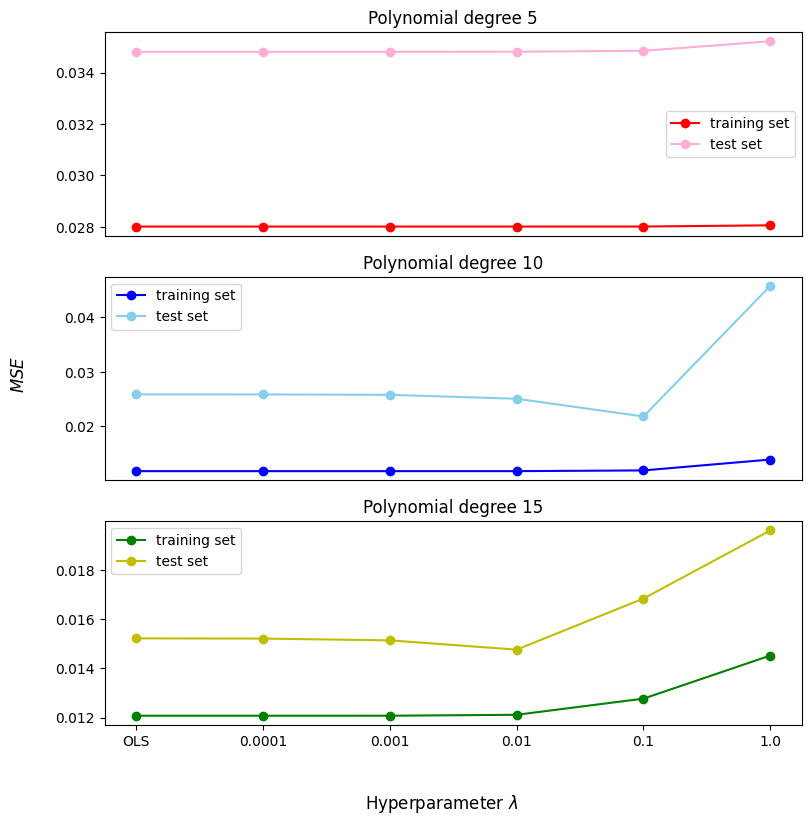

In [14]:
colors = [["r", "#ffaed7"], ["b", "skyblue"], ["g", "y"]]
fig, axs = plt.subplots(3, 1, figsize = (9, 9))
for i in range(3):
    axs[i].plot([-5, *np.log10(np.array(lam_list[1:]))], MSE_train[i], colors[i][0], marker = "o", label = "training set")
    axs[i].plot([-5, *np.log10(np.array(lam_list[1:]))], MSE_test[i], colors[i][1], marker = "o", label = "test set")
    axs[i].legend()
    axs[i].set_title(f"Polynomial degree {(i+1)*5}")
    if i < 2:
        axs[i].set_xticks([])
axs[2].set_xticks([-5, *np.log10(np.array(lam_list[1:]))], labels = ["OLS", *lam_list[1:]])
fig.supxlabel(r"Hyperparameter $\lambda$")
fig.supylabel(r"$MSE$")
plt.show()

### Discussion:

We clearly see that for small $\lambda$ the computed training and test $MSE$ values are almost the same as for OLS, as expected. However, I am not sure as to why the $MSE$ values generally increase with $\lambda$, since I would expect the opposite to be the case.